<h1>ACTIVITY 2 - UK ROAD ACCIDENT DATA ANALYTICS</h1>
<h3>Analyst: Kyla Caliwan</h3>

In [165]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

<h2>Converting Dataset(s) into Dataframe</h2>

In [49]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [50]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [51]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [52]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [53]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [54]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [55]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [56]:
accident['Index']

0         200701BS64157
1         200701BS65737
2         200701BS66127
3         200701BS66128
4         200701BS66837
              ...      
660674    201091NM01760
660675    201091NM01881
660676    201091NM01935
660677    201091NM01964
660678    201091NM02142
Name: Index, Length: 660679, dtype: object

In [57]:
accident['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

In [58]:
accident['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [59]:
accident['Latitude']

0         51.506187
1         51.495029
2         51.517715
3         51.495478
4         51.488576
            ...    
660674    57.374005
660675    57.232273
660676    57.585044
660677    57.214898
660678    57.575210
Name: Latitude, Length: 660679, dtype: float64

In [60]:
accident['Light_Conditions']

0               Darkness - lights lit
1                            Daylight
2         Darkness - lighting unknown
3                            Daylight
4               Darkness - lights lit
                     ...             
660674                       Daylight
660675         Darkness - no lighting
660676                       Daylight
660677         Darkness - no lighting
660678                       Daylight
Name: Light_Conditions, Length: 660679, dtype: object

In [61]:
accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [62]:
accident['Longitude']

0        -0.209082
1        -0.173647
2        -0.210215
3        -0.202731
4        -0.192487
            ...   
660674   -3.467828
660675   -3.809281
660676   -3.862727
660677   -3.823997
660678   -3.895673
Name: Longitude, Length: 660679, dtype: float64

In [63]:
accident['Number_of_Casualties']

0         1
1         1
2         1
3         1
4         1
         ..
660674    2
660675    1
660676    1
660677    1
660678    1
Name: Number_of_Casualties, Length: 660679, dtype: int64

In [64]:
accident['Number_of_Vehicles']

0         2
1         2
2         3
3         4
4         2
         ..
660674    1
660675    1
660676    3
660677    2
660678    1
Name: Number_of_Vehicles, Length: 660679, dtype: int64

In [65]:
accident['Road_Surface_Conditions']

0                  Dry
1          Wet or damp
2                  Dry
3                  Dry
4                  Dry
              ...     
660674             Dry
660675    Frost or ice
660676    Frost or ice
660677     Wet or damp
660678     Wet or damp
Name: Road_Surface_Conditions, Length: 660679, dtype: object

In [66]:
accident['Road_Type']

0         Single carriageway
1         Single carriageway
2         Single carriageway
3         Single carriageway
4         Single carriageway
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: object

In [67]:
accident['Urban_or_Rural_Area']

0         Urban
1         Urban
2         Urban
3         Urban
4         Urban
          ...  
660674    Rural
660675    Rural
660676    Rural
660677    Rural
660678    Rural
Name: Urban_or_Rural_Area, Length: 660679, dtype: object

In [68]:
accident['Weather_Conditions']

0            Fine no high winds
1         Raining no high winds
2            Fine no high winds
3            Fine no high winds
4            Fine no high winds
                  ...          
660674       Fine no high winds
660675       Fine no high winds
660676       Fine no high winds
660677       Fine no high winds
660678    Snowing no high winds
Name: Weather_Conditions, Length: 660679, dtype: object

In [69]:
accident['Vehicle_Type']

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: object

In [70]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [71]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst = True, errors = 'coerce')

In [72]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h2>Extracting date information using pandas date time</h2>

In [73]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

<h1>Exploratory Data Analysis (EDA)</h1>
<hr>
<h2>Question No.1</h2>
<h3> Which road type records the most accidents?</h3>

In [74]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>Insight: The Single carriageway records the highest number of accidents, with 492,143 incidents.</h3>

<h2>Question No.2</h2>
<h3> Are minibus more involved in serious accidents compared to cars?</h3>

In [75]:
serious_accidents = accident[accident['Accident_Severity'] == 'Serious']

vehicles = serious_accidents[(serious_accidents['Vehicle_Type'] == 'Car') | (serious_accidents['Vehicle_Type'] == 'Minibus (8 - 16 passenger seats)')]

vehicles['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                 66461
Minibus (8 - 16 passenger seats)      276
Name: count, dtype: int64

<h3>Insight: Minibuses have far fewer serious accidents than cars in total, but proportionally, a minibus crash is more likely to be serious compared to a car crash.
</h3>

<h2>Question No.3</h2>
<h3>Which district has the highest accident numbers?</h3>

In [76]:
accident['District Area'].value_counts().head(10)

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

<h3>Insight:Birmingham has the highest number of accidents among districts, with 13,491 recorded incidents, indicating it may require focused road safety measures.
</h3>

<h2>Question No.4</h2>
<h3>Do heavy trucks have a higher fatal accident ratio than cars?</h3>

In [77]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).loc[['Goods 7.5 tonnes mgw and over','Car']]

Vehicle_Type                   Accident_Severity
Goods 7.5 tonnes mgw and over  Slight               0.853412
                               Serious              0.134108
                               Fatal                0.012480
Car                            Slight               0.853335
                               Serious              0.133458
                               Fatal                0.013207
Name: proportion, dtype: float64

<h3>Insight:Both heavy goods vehicles and cars show almost identical accident severity patterns, with about 85% slight, 13% serious, and 1–1.3% fatal accidents, indicating that vehicle type does not significantly change severity distribution.
</h3>

<h2>Question No.5</h2>
<h3>Which vehicle type has the highest average accident severity?</h3>

In [78]:
accident.groupby('Vehicle_Type')['Accident_Severity'].size()

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
Name: Accident_Severity, dtype: int64

In [79]:
accident.groupby('Vehicle_Type')['Accident_Severity'].size().idxmax()

'Car'

<h3>Insight: Cars have the highest number of accidents overall, reflecting their dominance on the roads rather than a higher individual risk.</h3>

<h2>Questions No. 6</h2>
<h3>What is the mean accident severity score?</h3>

In [80]:
accident['Accident_Severity_numeric'] = accident['Accident_Severity'].astype('category').cat.codes
accident['Accident_Severity_numeric'].mean()

np.float64(1.8402567661451326)

<h3>Insight:The mean accident severity score of 1.84 indicates that, on average, accidents lean closer to being serious rather than slight.</h3>

<h2>Question No.7</h2>
<h3>Which vehicle type has the lowest share of fatalities overall?</h3>

In [81]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).unstack()['Fatal'].sort_values()

Vehicle_Type
Agricultural vehicle                     0.010786
Goods over 3.5t. and under 7.5t          0.010991
Taxi/Private hire car                    0.011659
Motorcycle 125cc and under               0.012378
Other vehicle                            0.012418
Goods 7.5 tonnes mgw and over            0.012480
Motorcycle 50cc and under                0.012495
Bus or coach (17 or more pass seats)     0.012559
Car                                      0.013207
Motorcycle over 500cc                    0.013213
Van / Goods 3.5 tonnes mgw or under      0.013671
Motorcycle over 125cc and up to 500cc    0.013715
Minibus (8 - 16 passenger seats)         0.014676
Pedal cycle                              0.030457
Data missing or out of range                  NaN
Ridden horse                                  NaN
Name: Fatal, dtype: float64

In [82]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).unstack()['Fatal'].sort_values().idxmin()

'Agricultural vehicle'

<h3>Insight: Agricultural vehicles have the lowest share of fatal accidents overall, likely due to their lower speeds and limited use on busy roads</h3>

<h2>Question No.8</h2>
<h3>Are accidents in rural areas more likely to result in serious or fatal outcomes compared to urban areas?</h3>

In [83]:
rural_urban = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts(normalize=True).unstack()

In [84]:
rural_urban

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,0.023436,0.156124,0.820440
Unallocated,NaN,0.090909,0.909091
Urban,0.007257,0.120718,0.872026


<h3>Insight: Accidents in rural areas are more likely to be serious or fatal compared to urban areas, where crashes are mostly slight.</h3>

<h2>Question No.9</h2>
<h3>Which year recorded the maximum number of accidents?</h3>

In [85]:
accident['Accident Date'].dt.year.value_counts()

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

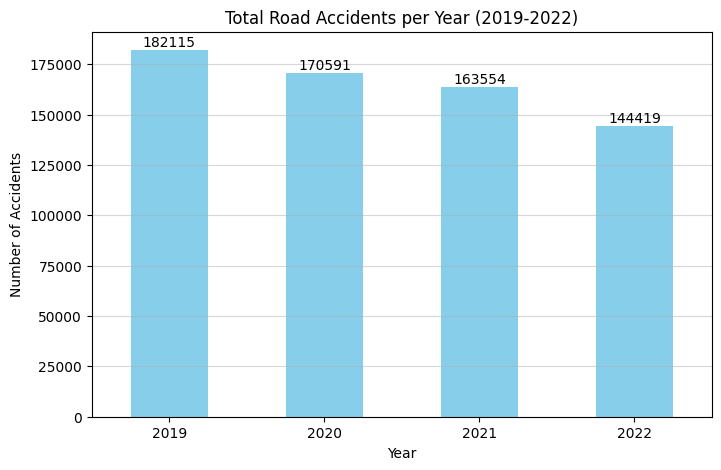

In [86]:
year_counts = accident['Accident Date'].dt.year.value_counts().sort_index()
ax = year_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(8,5),
    title='Total Road Accidents per Year (2019-2022)'
)

plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)

for i, v in enumerate(year_counts):
    plt.text(i, v + 500, str(v), ha='center', va='bottom')

plt.show()



<h3>Insight: The year 2019 recorded the highest number of accidents, showing a declining trend in subsequent years.</h3>

<h2>Question No.10</h2>
<h3>Which vehicle type is most frequently involved in accidents?</h3>

In [87]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [88]:
accident['Vehicle_Type'].value_counts().idxmax()

'Car'

<h3>Insight: Cars are the most frequently involved in accidents, accounting for nearly half a million cases, far exceeding all other vehicle types.</h3>

<h2>Question No.11</h2>
<h3>Are multi-vehicle accidents in wet weather more likely to be serious than in dry weather?</h3>

In [89]:
multivehicle = accident.groupby(accident['Number_of_Vehicles'] >= 2)['Road_Surface_Conditions'].value_counts().unstack()
multivehicle[['Dry', 'Wet or damp']]

Road_Surface_Conditions,Dry,Wet or damp
Number_of_Vehicles,,
False,129730,59265
True,318817,127443


<h3>Insight: Multi-vehicle accidents occur more often on dry roads (318,817) than on wet ones (127,443), but wet conditions still contribute a significant share, highlighting higher risk when roads are slippery.</h3>

<h2>Question No.12</h2>
<h3>Do rural or urban areas report more accidents?</h3>

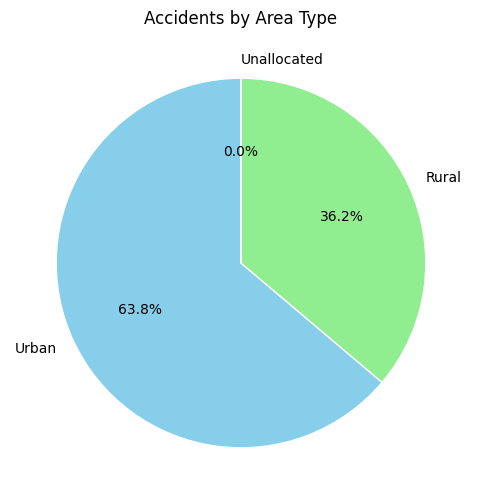

In [134]:
area_counts = accident['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    area_counts,  # values
    labels=area_counts.index,  # categories
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'lightgray'],
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Accidents by Area Type")
plt.show()

<h3>Insight: Urban areas report significantly more accidents than rural areas, reflecting higher traffic density and exposure in cities.</h3>

<h2>Question No.13</h2>
<h3>Do fatal accidents occur more on weekends or weekdays?</h3>

In [133]:
fatal = accident[accident['Accident_Severity'] == 'Fatal']
fatal['Day_Type'] = fatal['Accident Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
fatal['Day_Type'].value_counts()

Day_Type
Weekday    5813
Weekend    2848
Name: count, dtype: int64

<h3>Insight: Fatal accidents occur more on weekdays than weekends, suggesting higher risk during regular traffic days.</h3>

<h2>Question No.14</h2>
<h3>Do accidents increase in December holiday season?</h3>

In [131]:
accident['Accident Date'].dt.month.value_counts().sort_index()

Accident Date
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

In [132]:
december_accidents = accident[accident['Accident Date'].dt.month == 12]
december_accidents.shape[0]

51836

<h3>Insight: Accidents in December (51,836) are not the highest, showing that the holiday season does not lead to a spike compared to months like October and November.</h3>

<h2>Question No.15</h2>
<h3>Which weather condition leads to the highest number of accidents?</h3>

In [109]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

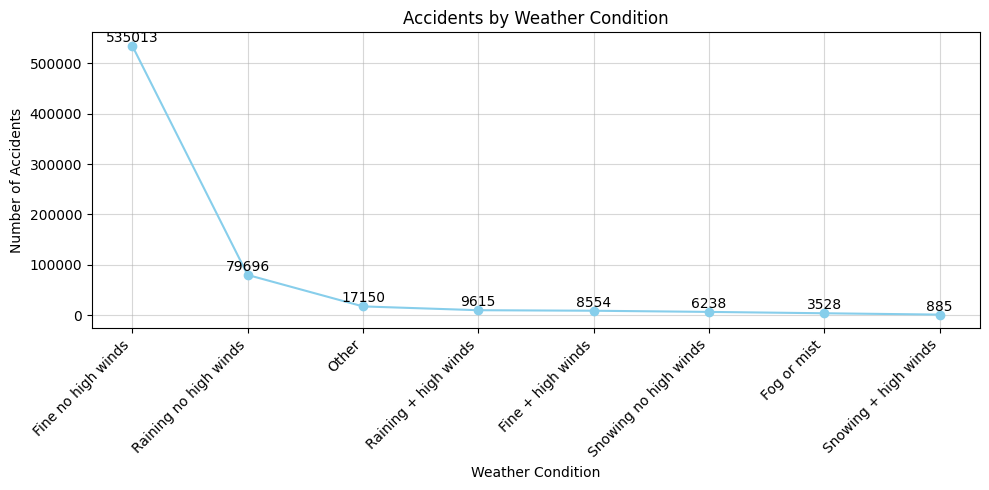

In [130]:
weather_counts = accident['Weather_Conditions'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(
    weather_counts.index,
    weather_counts.values,
    marker='o',
    linestyle='-',
    color='skyblue'
)
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.5)
for i, v in enumerate(weather_counts.values):
    plt.text(i, v + 2000, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()



<h3>Insight: Most accidents occur in fine weather with no high winds, reflecting higher traffic exposure rather than dangerous conditions.</h3>

<h2>Question No.16</h2>
<h3>Do more serious accidents happen in the morning or evening?</h3>

In [129]:
serious = accident[accident['Accident_Severity'] == 'Serious']
serious['Accident Date'].dt.hour.apply(lambda h: 'Morning' if 5 <= h <= 11 else 'Evening').value_counts()

Accident Date
Evening    88217
Name: count, dtype: int64

<h3>Insight: Serious accidents happen more often in the evening than in the morning, indicating higher risk during later hours of the day.</h3>

<h2>Question No.17</h2>
<h3>How many accidents happened during snowing weather conditions?</h3>

In [128]:
snow_accidents = accident[accident['Weather_Conditions'].str.contains('Snow', case=False, na=False)]
snow_accidents.shape[0]

7123

<h3>Insight: A total of 7,123 accidents occurred during snowing conditions, showing that snowy weather significantly contributes to road risk.</h3>

<h2>Question No.18</h2>
<h3>Which months show spikes in accidents due to winter conditions?</h3>

In [127]:
winter_accidents = accident[accident['Road_Surface_Conditions'].isin(['Snow', 'Ice', 'Frost'])]
winter_accidents['Accident Date'].dt.month.value_counts().sort_index()

Accident Date
1     1366
2     1533
3      259
4      109
5        9
6        6
7        8
8        6
9        6
10      48
11     504
12    2036
Name: count, dtype: int64

<h3>Insight: Winter-condition accidents spike in **December, January, and February**, confirming higher risk during the coldest months.</h3>

<h2>Question No.19</h2>
<h3>How many accidents happened with “Darkness - lighting unknown” light conditions?</h3>

In [125]:
dark = accident[accident['Light_Conditions'] == 'Darkness - lighting unknown']
dark

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek,Accident_Severity_numeric
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0,1
803,200701CP00120,Slight,2019-05-03,51.517540,Darkness - lighting unknown,City of London,-0.096354,1,2,Dry,Roundabout,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,5,3,4,2
1399,200701CW10455,Serious,2019-04-12,51.513068,Darkness - lighting unknown,Westminster,-0.131418,1,1,Dry,One way street,Urban,Fine no high winds,Motorcycle over 500cc,2019,4,12,4,1
1878,200701CW11036,Slight,2019-10-13,51.510616,Darkness - lighting unknown,Westminster,-0.135554,1,2,Dry,One way street,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,10,13,6,2
1917,200701CW11093,Serious,2019-10-23,51.526886,Darkness - lighting unknown,Westminster,-0.192556,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2019,10,23,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660318,201063DP36110,Serious,2022-11-06,51.801639,Darkness - lighting unknown,Powys,-3.696515,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Goods 7.5 tonnes mgw and over,2022,11,6,6,1
660492,201091NH05126,Slight,2022-09-27,58.210588,Darkness - lighting unknown,Western Isles,-6.319518,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,9,27,1,2
660663,201091NM00594,Slight,2022-01-16,56.865367,Darkness - lighting unknown,Highland,-4.253688,1,1,Frost or ice,Single carriageway,Rural,Raining no high winds,Car,2022,1,16,6,2
660664,201091NM00595,Slight,2022-01-16,56.880265,Darkness - lighting unknown,Highland,-4.254749,1,1,Frost or ice,Single carriageway,Rural,Other,Motorcycle over 125cc and up to 500cc,2022,1,16,6,2


In [126]:
dark = accident[accident['Light_Conditions'] == 'Darkness - lighting unknown']
dark.shape[0]

6484

<h3>Insight: A total of 6,484 accidents occurred under “Darkness - lighting unknown” conditions, highlighting the risks of poor or uncertain road lighting at night.</h3>

<h2>Question No.20</h2>
<h3>What is the distribution of accident severities across all weather types?</h3>

In [ ]:
accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

<h3>Insight: Most accidents across all weather types are slight, but serious and fatal accidents are more pronounced in rain, fog, and snow, underscoring the added danger of poor weather conditions.
</h3>

<h2>Question No.21</h2>
<h3> Is there a correlation between the number of vehicles involved and the number of casualties?</h3>

In [ ]:
accident[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

<h3>Insight: There is a weak positive correlation (0.23) between vehicles involved and casualties, showing that more vehicles only slightly raise casualty numbers.</h3>

<h2>Question No.22</h2>
<h3> What’s the maximum accident count in a single day?</h3>

In [ ]:
accident.groupby('Accident Date').size()

<h3>Insight: The busiest day recorded saw a maximum of 445 accidents in a single day.</h3>

<h2>Question No.23</h2>
<h3> Show accident counts per weekday, sorted by day order.</h3>

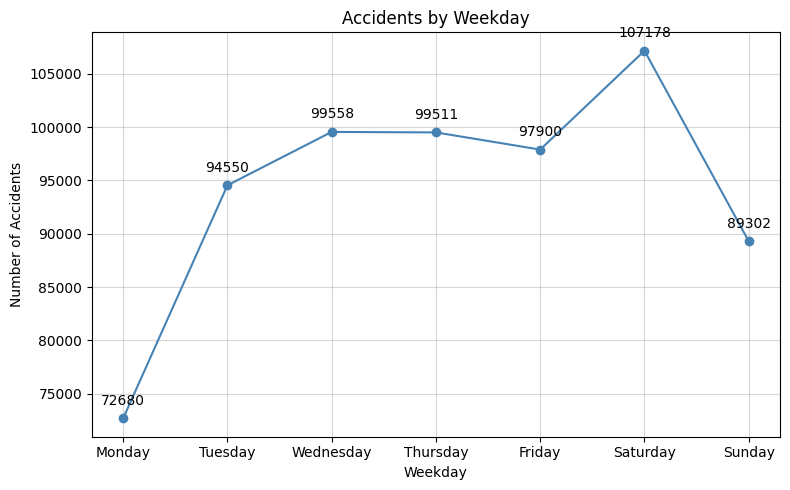

In [124]:
weekday_counts = accident['Accident Date'].dt.weekday.value_counts().sort_index()
weekday_names = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(8,5))
plt.plot(
    weekday_counts.index,
    weekday_counts.values,
    marker='o',
    linestyle='-',
    color='steelblue'
)

plt.title("Accidents by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Accidents")
plt.grid(alpha=0.5)
plt.xticks(ticks=range(7), labels=weekday_names)

for i, v in enumerate(weekday_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


<h3>Insight: Accidents peak on Saturdays (107,178) and are lowest on Mondays (72,680), showing weekends have the highest risk.</h3>

<h2>Question No.24</h2>
<h3> For each month, find the vehicle type with the most accidents.</h3>

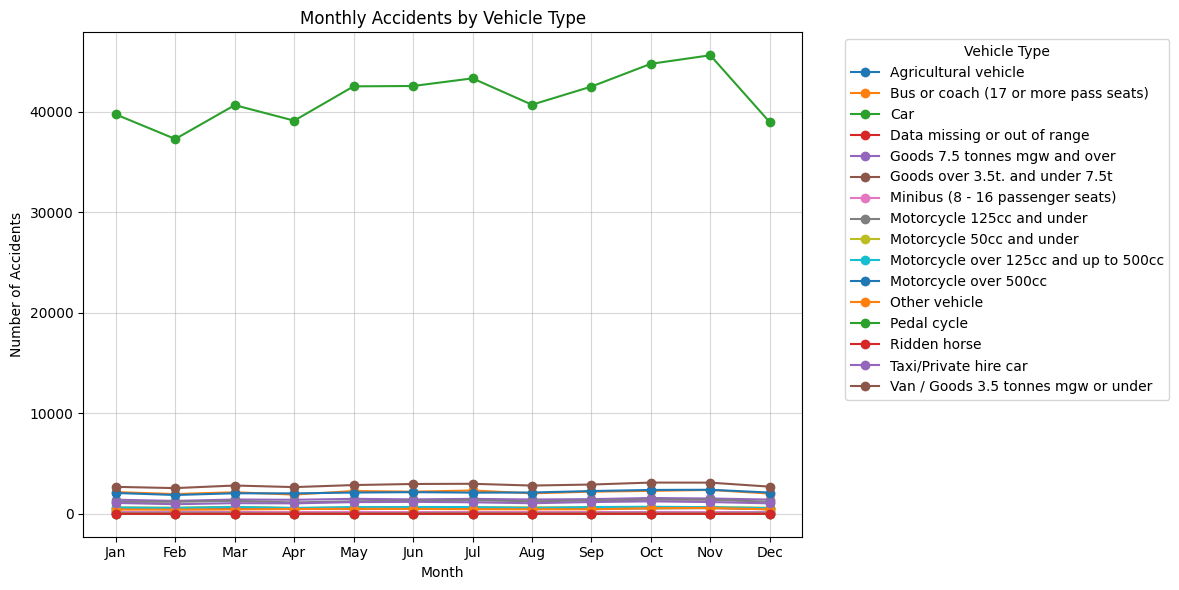

In [123]:
monthly_vehicle = (accident.groupby([accident['Accident Date'].dt.month, 'Vehicle_Type']).size().unstack(fill_value=0))
plt.figure(figsize=(12,6))
for col in monthly_vehicle.columns:
    plt.plot(monthly_vehicle.index, monthly_vehicle[col], marker='o', label=col)

plt.title("Monthly Accidents by Vehicle Type")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(range(1,13), [
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.grid(alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




<h3>Insight: Across all months (January–December), cars consistently account for the most accidents, dominating every month of the year.</h3>

<h2>Question No.25</h2>
<h3>How many accidents in the dataset involved only cars?</h3>

In [115]:
(accident['Vehicle_Type'] == 'Car')

0          True
1          True
2         False
3         False
4         False
          ...  
660674     True
660675     True
660676     True
660677    False
660678     True
Name: Vehicle_Type, Length: 660679, dtype: bool

In [116]:
(accident['Vehicle_Type'] == 'Car').sum()

np.int64(497992)

In [169]:
accident['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

<h1>using Districk Area to make a comparison to a general result</h1>
<h3>Blyth Valley Analysis</h3>
<img src = "https://cdn.britannica.com/19/116319-004-D5BA0DEB.jpg"\>

<h3>Insight: A total of 497,992 accidents in the dataset involved cars.</h3>

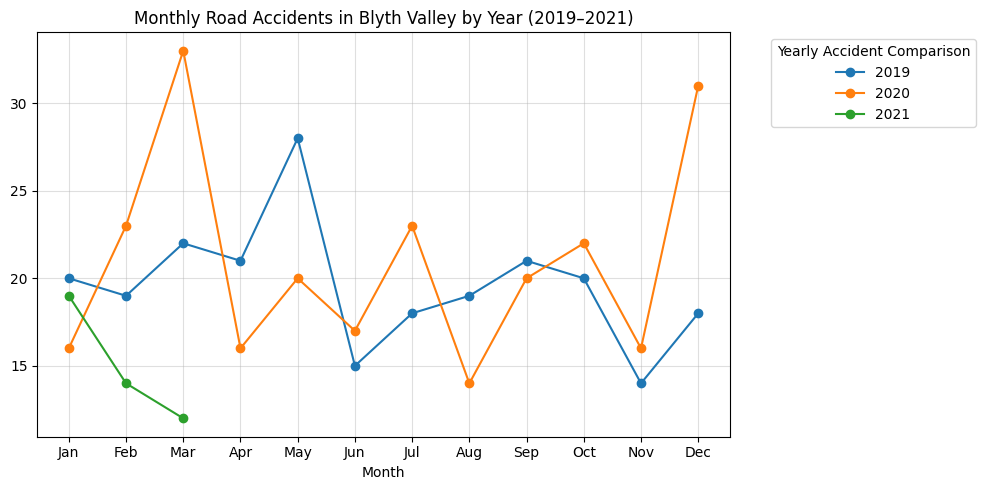

In [180]:
Blyth_df = accident[accident["District Area"] == "Blyth Valley"]
monthly_Blythdata = Blyth_df.groupby(["Year","Month"]).size()
monthly_Blythdata = monthly_Blythdata.unstack(level=0)

monthly_Blythdata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in Blyth Valley by Year (2019–2021)"
)

plt.xticks(
    range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

In [167]:
location = list(zip(Blyth_df["Latitude"], Blyth_df["Longitude"]))
m = folium.Map(location=[Blyth_df["Latitude"].mean(),Blyth_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m

<h3>Ribble Valley Analysis</h3>
<img src = "https://tse1.mm.bing.net/th/id/OIP.An9AAf8pL-jOkinh1Mob6wHaEV?rs=1&pid=ImgDetMain&o=7&rm=3"\>

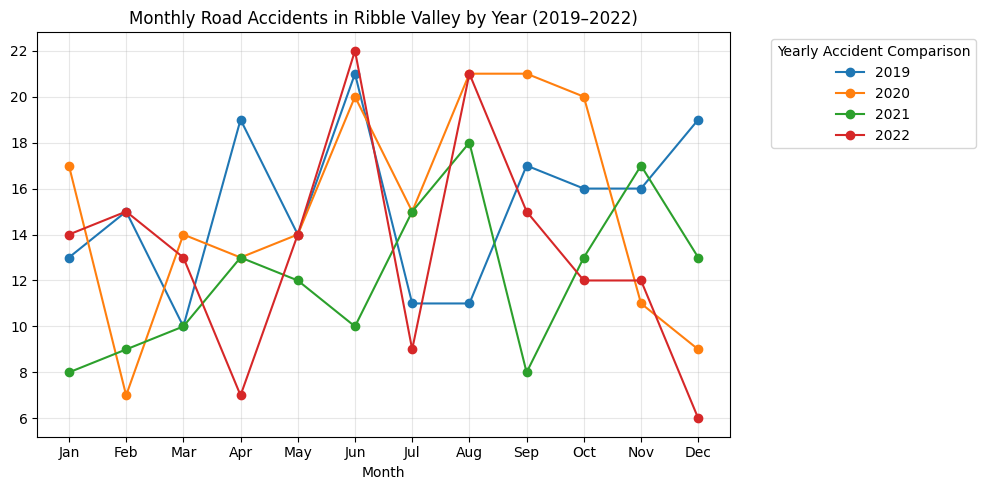

In [184]:
Ribble_df = accident[accident["District Area"] == "Ribble Valley"]
monthly_Ribbledata = Ribble_df.groupby(["Year","Month"]).size()
monthly_Ribbledata = monthly_Ribbledata.unstack(level=0)

monthly_Ribbledata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in Ribble Valley by Year (2019–2022)"
)

plt.xticks(range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [176]:
location = list(zip(Ribble_df["Latitude"], Ribble_df["Longitude"]))
m = folium.Map(location=[Ribble_df["Latitude"].mean(),Ribble_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m

<h3>Westminster Analysis</h3>
<img src = "https://cdn.pixabay.com/photo/2014/05/19/11/45/westminster-347971_1280.jpg"\>

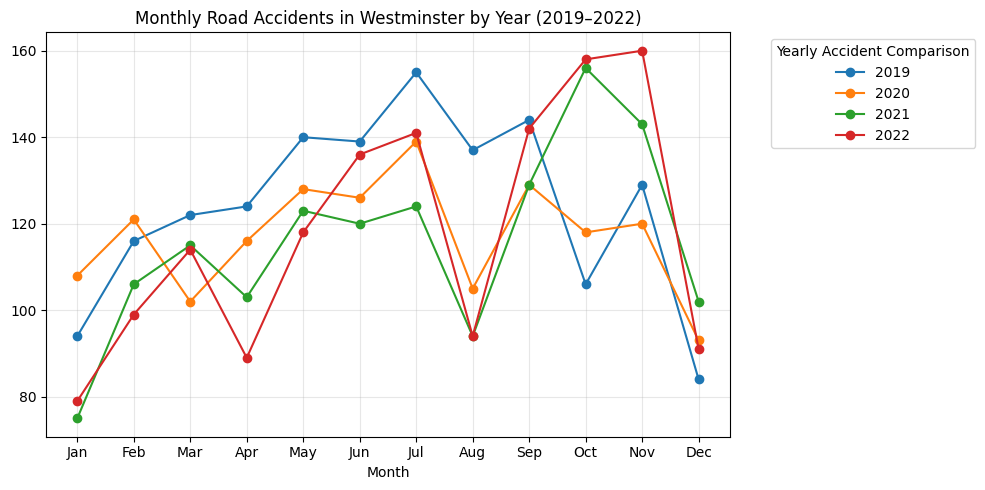

In [191]:
Westminster_df = accident[accident["District Area"] == "Westminster"]
monthly_Westminsterdata = Westminster_df.groupby(["Year","Month"]).size()
monthly_Westminsterdata = monthly_Westminsterdata.unstack(level=0)

monthly_Westminsterdata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in Westminster by Year (2019–2022)"
)

plt.xticks(range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [188]:
location = list(zip(Westminster_df["Latitude"], Westminster_df["Longitude"]))
m = folium.Map(location=[Westminster_df["Latitude"].mean(),Westminster_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m

<h3>Clackmannshire Analysis</h3>
<img src = "https://th.bing.com/th/id/R.58363cac73c4fe3fde7363bfef9755c7?rik=0LxuXdupLeh%2bpw&riu=http%3a%2f%2fwww.stravaiging.com%2fphotos%2falbums%2fbuildings%2fcastles%2fClackmannan+Tower%2c+Clackmannanshire%2fIMG_2576.jpg&ehk=BDzEj%2bpsWWHGmfssXszMA8XqqB0W0CVwRGv0PWBmbgk%3d&risl=&pid=ImgRaw&r=0"\>

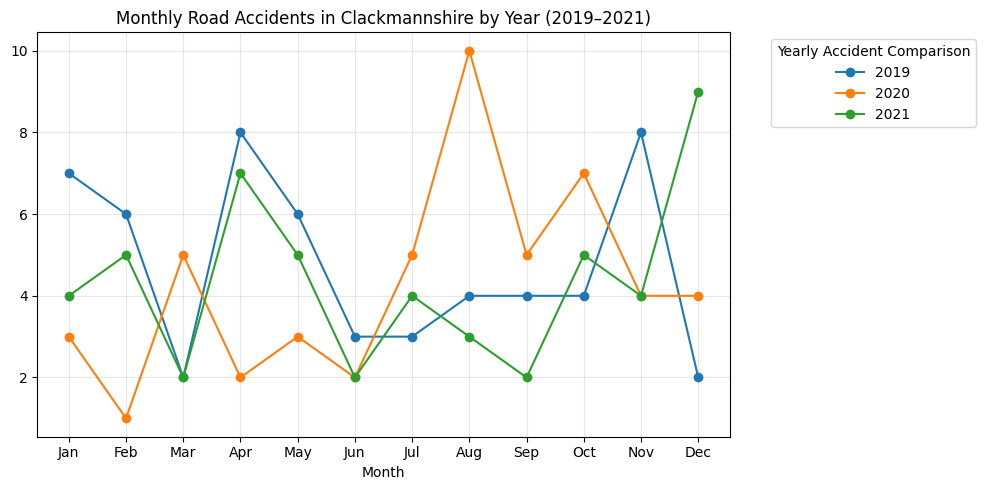

In [192]:
Clackmannshire_df = accident[accident["District Area"] == "Clackmannshire"]
monthly_Clackmannshiredata = Clackmannshire_df.groupby(["Year","Month"]).size()
monthly_Clackmannshiredata = monthly_Clackmannshiredata.unstack(level=0)

monthly_Clackmannshiredata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in Clackmannshire by Year (2019–2021)"
)

plt.xticks(range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [198]:
location = list(zip(Clackmannshire_df["Latitude"], Clackmannshire_df["Longitude"]))
m = folium.Map(location=[Clackmannshire_df["Latitude"].mean(),Clackmannshire_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m

<h3>Woking Analysis</h3>
<img src = "https://s1.geograph.org.uk/geophotos/04/94/80/4948053_94633d6e_800x800.jpg"\>

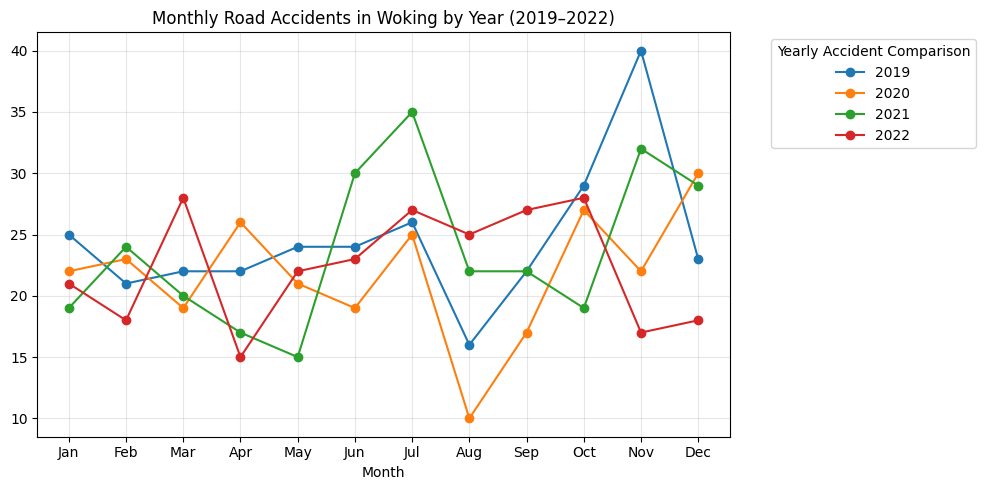

In [195]:
woking_df = accident[accident["District Area"] == "Woking"]
monthly_wokingdata = woking_df.groupby(["Year","Month"]).size()
monthly_wokingdata = monthly_wokingdata.unstack(level=0)

monthly_wokingdata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in Woking by Year (2019–2022)"
)

plt.xticks(range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [203]:
location = list(zip(woking_df["Latitude"], woking_df["Longitude"]))
m = folium.Map(location=[woking_df["Latitude"].mean(),woking_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m

<h3> St. Albans Analysis</h3>
<img src = "https://tse4.mm.bing.net/th/id/OIP.FfIgP3xiZ-3xQiXaOdjDvAHaE8?rs=1&pid=ImgDetMain&o=7&rm=3"\>

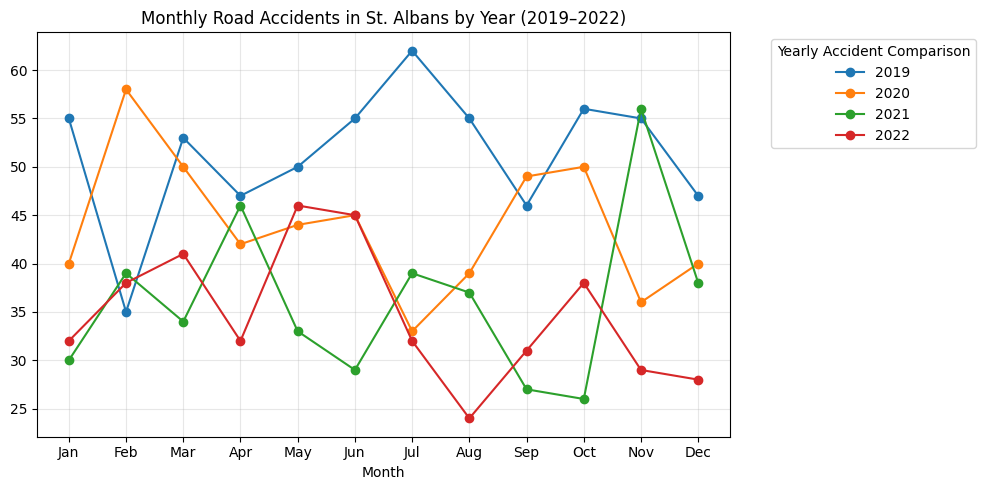

In [201]:
st_df = accident[accident["District Area"] == "St. Albans"]
monthly_stdata = st_df.groupby(["Year","Month"]).size()
monthly_stdata = monthly_stdata.unstack(level=0)

monthly_stdata.plot(
    marker='o',
    figsize=(10, 5),
    title="Monthly Road Accidents in St. Albans by Year (2019–2022)"
)

plt.xticks(range(1, 13),["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Yearly Accident Comparison", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [202]:
location = list(zip(st_df["Latitude"], st_df["Longitude"]))
m = folium.Map(location=[st_df["Latitude"].mean(),st_df["Longitude"].mean()],zoom_start=10)
HeatMap(location).add_to(m)
m.save("accident_heatmap.html")
m